In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
df = pd.read_csv("movieReplicationSet.csv")

In [2]:
movie = df.iloc[:,:400]

In [3]:
# Question 1 separation
print(movie)
movie_array = movie.to_numpy()

count = np.zeros(400)
for i in range(400):
    count[i] = np.count_nonzero(~np.isnan(movie_array[:,i]))

      The Life of David Gale (2003)  Wing Commander (1999)  \
0                               NaN                    NaN   
1                               NaN                    NaN   
2                               NaN                    NaN   
3                               NaN                    NaN   
4                               NaN                    NaN   
...                             ...                    ...   
1092                            NaN                    NaN   
1093                            3.0                    4.0   
1094                            NaN                    NaN   
1095                            NaN                    NaN   
1096                            NaN                    NaN   

      Django Unchained (2012)  Alien (1979)  \
0                         4.0           NaN   
1                         1.5           NaN   
2                         NaN           NaN   
3                         2.0           NaN   
4                   

In [12]:
# Question 2 separation
import re
year = np.zeros(400)
for i,v in enumerate(movie.columns):
    r1 = re.findall("\([0-9]{4}\)",v)
    r1 = int(r1[0][1:5])
    year[i] = r1
year = np.sort(year)
print(year)

print(year[199])
# median year is 1999 and we include it in the part with that are later

[1960. 1966. 1966. 1966. 1967. 1967. 1967. 1968. 1968. 1968. 1968. 1968.
 1969. 1969. 1969. 1970. 1970. 1970. 1971. 1971. 1971. 1972. 1972. 1972.
 1973. 1973. 1973. 1973. 1974. 1974. 1974. 1974. 1975. 1975. 1975. 1976.
 1976. 1976. 1976. 1976. 1977. 1977. 1977. 1977. 1978. 1978. 1978. 1978.
 1979. 1979. 1979. 1979. 1980. 1980. 1980. 1980. 1981. 1981. 1981. 1981.
 1982. 1982. 1982. 1982. 1982. 1983. 1983. 1983. 1984. 1984. 1984. 1984.
 1985. 1985. 1985. 1985. 1985. 1986. 1986. 1986. 1986. 1986. 1987. 1987.
 1987. 1987. 1987. 1987. 1988. 1988. 1988. 1988. 1988. 1988. 1988. 1989.
 1989. 1989. 1989. 1989. 1990. 1990. 1990. 1990. 1990. 1990. 1990. 1991.
 1991. 1991. 1991. 1991. 1991. 1992. 1992. 1992. 1992. 1992. 1992. 1993.
 1993. 1993. 1993. 1993. 1993. 1993. 1993. 1994. 1994. 1994. 1994. 1994.
 1994. 1994. 1994. 1994. 1994. 1994. 1995. 1995. 1995. 1995. 1995. 1995.
 1995. 1995. 1995. 1995. 1995. 1995. 1995. 1995. 1995. 1995. 1995. 1996.
 1996. 1996. 1996. 1996. 1996. 1996. 1996. 1996. 19

In [4]:

user = np.zeros((len(movie_array),len(movie_array[0])))
temp = []
for i in range(len(movie_array)):
    temp = []
    for num in movie_array[i]:
        if num >= 0:
            temp.append(num)
    temp.sort()
    for j in range(len(movie_array[i])):
        if(movie_array[i][j] >= 0):
            res = stats.percentileofscore(temp, movie_array[i][j])
            user[i,j] = res
print(user)

[[ 0.          0.         86.42857143 ...  0.          0.
   0.        ]
 [ 0.          0.         20.45454545 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.         82.88288288 ...  0.          0.
   0.        ]]


In [5]:
# using mean of normalized rating
# para = np.zeros(400)
# for i in range(400):
#     sum_nonzero =  np.sum(user[:,i])
#     total_nonzero = np.count_nonzero(user[:,i])
#     para[i] = sum_nonzero/total_nonzero
# print(para)

# using median of normalized rating
print(len(user))

para = np.zeros(400)
for i in range(400):
    res = np.nonzero(user[:,i])
    all_nonzero =  user[res,i]
    median_nonzero = np.median(all_nonzero)
    para[i] = median_nonzero
print(para)

1097
[39.87882738 37.1031746  64.35643564 43.49315068 41.60714286 47.06088939
 31.34583628 58.19638028 44.95967742 53.75961104 29.17365113 46.20938628
 33.05890538 46.49681529 34.83714211 36.40472983 55.47161172 57.93103448
 26.47186147 37.05882353 55.81834021 57.91093033 70.19230769 39.28571429
 43.30708661 46.70886076 70.66115702 33.91719745 47.1810089  35.07462687
 30.97865876 62.26415094 42.10526316 55.52995392 63.7037037  42.43265448
 32.43944637 45.31499203 29.16666667 52.38044672 55.41030939 46.80851064
 32.23955139 43.71257485 35.42800265 38.13569443 28.30188679 37.58116883
 40.86538462 35.41666667 46.36633646 34.72222222 43.71257485 34.97926958
 62.91666667 61.86440678 35.43931159 41.25       75.53584906 38.27838828
 30.19886364 40.51094891 33.         39.25763802 33.20918367 34.07035471
 46.06741573 34.6383888  36.5489695  30.89921319 46.78899083 45.77656676
 40.61032864 53.22580645 33.6013896  42.35294118 30.25821082 55.13513514
 37.53426744 40.29411765 48.54792681 65.469493

In [13]:
#threshold = np.median(count) #Q1
threshold = np.median(year) #Q2

larger_group_index = []
smaller_group_index = []

# for i in range(len(count)): #Q1
#     if (count[i] >= threshold):
#         larger_group_index.append(i)
#     else:
#         smaller_group_index.append(i)

for i in range(len(year)): #Q2
    if (year[i] >= threshold):
        larger_group_index.append(i)
    else:
        smaller_group_index.append(i)

In [14]:
para_s = para[smaller_group_index]
para_l = para[larger_group_index]

In [15]:
# print(para_s/100)
# print(para_l/100)
print(np.mean(para_s))
print(np.mean(para_l))
print(np.std(para_s))
print(np.std(para_l))

45.943241947876686
48.695942233371355
11.664682671877049
11.624608845858601


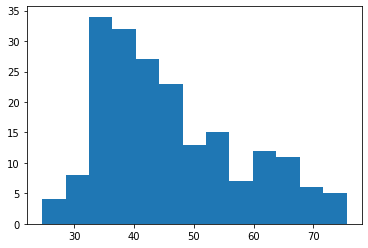

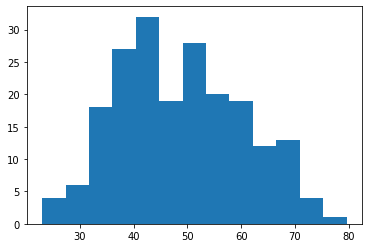

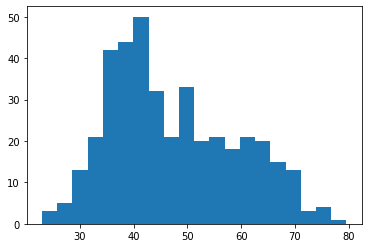

In [16]:
import matplotlib.pyplot as plt
plt.hist(para_s,bins=13)
plt.show()
plt.hist(para_l,bins=13)
plt.show()
plt.hist(para,bins=20)
plt.show()

In [17]:
res1 = stats.ttest_ind(para_s/100,para_l/100)
res2 = stats.mannwhitneyu(para_s/100,para_l/100)

print(res1)
print(res2)

Ttest_indResult(statistic=-2.35779417212865, pvalue=0.018866979762164598)
MannwhitneyuResult(statistic=16931.5, pvalue=0.008047488587018127)


In [6]:
df_s = df.iloc[:,smaller_group_index]
df_l = df.iloc[:,larger_group_index]


In [7]:
print(df_s)
print(df_l)

      The Life of David Gale (2003)  Wing Commander (1999)  Snatch (2000)  \
0                               NaN                    NaN            NaN   
1                               NaN                    NaN            NaN   
2                               NaN                    NaN            NaN   
3                               NaN                    NaN            NaN   
4                               NaN                    NaN            NaN   
...                             ...                    ...            ...   
1092                            NaN                    NaN            NaN   
1093                            3.0                    4.0            4.0   
1094                            NaN                    NaN            NaN   
1095                            NaN                    NaN            NaN   
1096                            NaN                    NaN            NaN   

      Rambo: First Blood Part II  Let the Right One In (2008)  \
0         

In [6]:
from scipy import stats
df = pd.read_csv("movieReplicationSet.csv")
movie1 = df[["Home Alone (1990)"]]
movie1 = movie1.dropna()
movie1 = movie1.to_numpy()
movie2 = df[["Finding Nemo (2003)"]]
movie2 = movie2.dropna()
movie2 = movie2.to_numpy()
print(movie1)
print(movie2)
stats.ks_2samp(movie1[:,0], movie2[:,0])

[[4. ]
 [4. ]
 [4. ]
 [1.5]
 [2. ]
 [4. ]
 [3.5]
 [3. ]
 [4. ]
 [3. ]
 [4. ]
 [4. ]
 [4. ]
 [3.5]
 [3. ]
 [4. ]
 [3. ]
 [4. ]
 [4. ]
 [2. ]
 [2.5]
 [3.5]
 [4. ]
 [3. ]
 [3. ]
 [4. ]
 [4. ]
 [4. ]
 [4. ]
 [3.5]
 [3. ]
 [3.5]
 [4. ]
 [3. ]
 [3. ]
 [3. ]
 [3. ]
 [4. ]
 [4. ]
 [4. ]
 [4. ]
 [2.5]
 [3. ]
 [3.5]
 [3.5]
 [3. ]
 [4. ]
 [1. ]
 [2.5]
 [4. ]
 [4. ]
 [4. ]
 [4. ]
 [4. ]
 [3.5]
 [3. ]
 [3. ]
 [2.5]
 [1.5]
 [3. ]
 [4. ]
 [3. ]
 [4. ]
 [4. ]
 [4. ]
 [4. ]
 [1. ]
 [4. ]
 [3. ]
 [1.5]
 [3.5]
 [2.5]
 [3. ]
 [2. ]
 [3. ]
 [3.5]
 [4. ]
 [3. ]
 [3.5]
 [4. ]
 [3.5]
 [3.5]
 [4. ]
 [0.5]
 [2. ]
 [3. ]
 [3. ]
 [4. ]
 [4. ]
 [3. ]
 [3. ]
 [4. ]
 [3.5]
 [4. ]
 [4. ]
 [4. ]
 [2. ]
 [4. ]
 [4. ]
 [3. ]
 [0.5]
 [4. ]
 [4. ]
 [4. ]
 [3.5]
 [4. ]
 [2. ]
 [3.5]
 [4. ]
 [3.5]
 [3.5]
 [4. ]
 [3. ]
 [4. ]
 [4. ]
 [4. ]
 [1. ]
 [3.5]
 [2.5]
 [3.5]
 [3. ]
 [3.5]
 [2. ]
 [4. ]
 [3.5]
 [3.5]
 [4. ]
 [2.5]
 [3. ]
 [3. ]
 [3.5]
 [3.5]
 [3. ]
 [3.5]
 [2.5]
 [1.5]
 [2.5]
 [1.5]
 [3. ]
 [3.5]
 [2.5]
 [4. ]
 [3. ]

KstestResult(statistic=0.15269080020897632, pvalue=6.379381467525036e-10)